### <p style="text-align: right;"> &#9989; Wenquan Lai.</p>

# CMSE Homework 05

## Using Tensorflow/Keras for classification


### Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are 25 points possible on this assignment. Point values for each part are included in the section headers.

This assignment is due roughly two weeks from now at 11:59 pm on **Friday Dec. 4th**. It should be uploaded into the "Homework Assignments" submission folder for Homework #5 in your D2L webpage. Submission instructions can be found at the end of the notebook.

**Hint**: It is possible you are asked to do something you are not familiar with. That's why you have internet access. Do some smart searches and see what you can find! 

### Goals for this homework assignment

The goal for this assignment is for you to learn about neural network implemented by __Tensorflow__ and __Keras__ to do some basic classification tasks. Unless you already have experience with Tensorflow or Keras or similar libraries, you will not understand everything about this right away. You probably haven't even installed Tensorflow yet. Don't worry, that is perfectly fine. We will walk through one example in detail. So don't worry if some steps seem arbitrary or look like magic to you! We've got to start somewhere.

[Tensorflow](https://www.tensorflow.org/) is a free and open-source software library for machine learning. It is one of the most popular software package for training and inference of deep neural networks. [Keras](https://keras.io/) is the high-level API of TensorFlow 2.0. 


To get started, you need to set up the required software. You can follow the detailed instruction from the [installation guide of Tensorflow](https://www.tensorflow.org/install) which also includes Keras. In most cases, you can simply type

`pip install --upgrade tensorflow`

Now you are ready for action!

__Note__ Following the installation guide, you should have installed Tensorflow V2.3.1, and   Numpy should be downgraded to V1.18.5. If you have trouble with installation or you run into issues with dead kernels, please check the versions of the packages installed and asked for help during help hours!

Below is the import for this assignement.

In [1]:
pip install --upgrade tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=4c5d7ecbd67f06c860cc2a869acc6322e90cd923009bea07c484981db7bec3df
  Stored in directory: c:\users\15197\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:
      Successfully uninstalled numpy-1.19.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
## Our import
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


---
## Part 1. Adding notebook to your turn-in repository

Like you did for Homework 3, you're going to add it to the CMSE202 repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to:

* Navigate to your /CMSE202/repos repository and create a new directory called hw-05.
* Move this notebook into that new directory in your repository, then add it and commit it to your repository.
   * Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

Important: Make sure you've added your TA as a collaborators to your respository with "Read" access so that we can see your assignment. (*If you did this for Homework 3, you do not need to do it again*)

* Section 001: tuethan
* Section 002: Luis-Polanco
* Section 003: DavidRimel

Also important: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, none of your changes will be tracked.

If everything went as intended, the file should now show up on your GitHub account CMSE202 repository under the hw-04 directory that you just created. Periodically, you'll be asked to commit your changes to the repository and push them to the remote GitHub location. Of course, you can always commit your changes more often than that, if you wish. It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

## Part 2: Classifying MNIST data (6 points)


We will now walk through a concrete example of a neural network, which makes use of  Keras to learn to classify hand-written digits.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 
categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been 
around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test 
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST 
as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine 
learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:



In [2]:
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [3]:
train_images.shape


(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a look at the test data:

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**Question 2.1 (1 points)** What is the size of the training and testing dataset for MNIST, respectively?

<font size=8 color="#009600">&#9998;</font> The size of trainning dataset for MINST is 60000 and The size of testing dataset for MINST is 10000

**Question 2.2 (2 points)** Make a histogram for the training label. Is this dataset balanced?

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

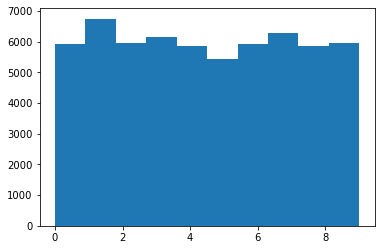

In [9]:
### Put your code here ###
plt.hist(train_labels)

We can also take a look at the individual images.

1

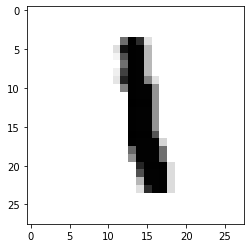

In [10]:
digit = train_images[6]
plt.imshow(digit, cmap=plt.cm.binary)
train_labels[6]


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [11]:
train_images = train_images.reshape(train_images.shape[0],-1)/255.0
test_images = test_images.reshape(test_images.shape[0],-1)/255.0

We also need to categorically encode the labels.

In [12]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Let’s start our neural network models.



<img src="https://miro.medium.com/max/1400/1*K0D3JOZJUTxX4Q-9CpiALw.jpeg" width= 800><p style="text-align: right;">



Our workflow will be as follow: first we will present our neural network with the training data, `train_images` and `train_labels`. The 
network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we 
will verify if these predictions match the labels from `test_labels`.

Let's build our network.



In [13]:
network = Sequential()
network.add(Dense(10, input_dim=784, activation='relu'))
network.add(Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

The Sequential model is the easiest model Keras has. The first line of `model.add` method is adding your hidden layer with 10 cells, coming from 784 input cells.

The second add method is adding your output layer to the network. This has 10 cells.

The Relu and Softmax activation options are non-linear. Being able to use non-linear data makes Neural Network particularly useful. Generally, neural networks can map any data distribution at any level of complexity.
You don’t have to know what Relu and Softmax are.  You just need to follow these tips:
1. Use Relu whenever possible, on every hidden layer.
2. Use Softmax on output layers with more than two categories to be predicted.
3. Use Sigmoid on an output layer with two categories.

After creating your model, call `compile` method to finish your model. It usually takes three parameters. Always use `categorical_crossentropy` for multi-categories, and `binary_crossentropy` for two categories. Use `adam` or `rmsprop` as the optimizer since both of them are pretty good. And you need accuracy as the `metric` to check your network performance.

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.  We will use 10% of the training data as the validation data, hence validation_split was set to 0.1.

In [14]:
history=network.fit(train_images, train_labels, epochs=20,  validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 1s 748us/step - loss: 0.5358 - accuracy: 0.8481 - val_loss: 0.2704 - val_accuracy: 0.9243
Epoch 2/20
1688/1688 [==============================] - 1s 684us/step - loss: 0.3108 - accuracy: 0.9125 - val_loss: 0.2399 - val_accuracy: 0.9310
Epoch 3/20
1688/1688 [==============================] - 1s 676us/step - loss: 0.2847 - accuracy: 0.9200 - val_loss: 0.2190 - val_accuracy: 0.9382
Epoch 4/20
1688/1688 [==============================] - 1s 702us/step - loss: 0.2707 - accuracy: 0.9241 - val_loss: 0.2182 - val_accuracy: 0.9390
Epoch 5/20
1688/1688 [==============================] - 1s 704us/step - loss: 0.2614 - accuracy: 0.9279 - val_loss: 0.2148 - val_accuracy: 0.9410
Epoch 6/20
1688/1688 [==============================] - 1s 723us/step - loss: 0.2541 - accuracy: 0.9287 - val_loss: 0.2045 - val_accuracy: 0.9447
Epoch 7/20
1688/1688 [==============================] - 1s 682us/step - loss: 0.2482 - accuracy: 0.9310 - val_loss: 0.2051 -

Four quantities are being displayed during training: the "loss" of the network over the training and validation data, and the accuracy of the network over 
the training and validation data.

`epoch` is the number of training loops we will do. One epoch will expose all of our training data once to the network. More epochs means the network will know better about our data.

We can plot a history of training and validation loss and accuracy.

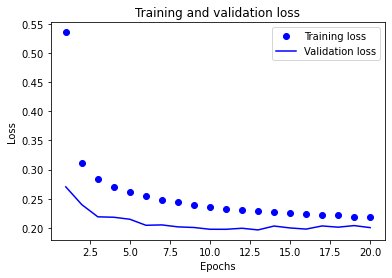

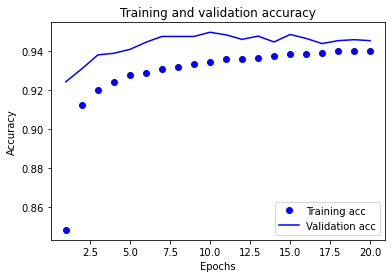

In [15]:
plt.clf()   # clear figure

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs=range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


The dots are the training loss and accuracy, while the solid lines are the validation loss and accuracy. *Note that your own results may vary 
slightly due to a different random initialization of your network.*

As you can see, the training loss decreases with every epoch and the training accuracy increases with every epoch. That's what you would 
expect when running gradient descent optimization -- the quantity you are trying to minimize should get lower with every iteration. But that 
isn't the case for the validation loss and accuracy: they seem to peak at the eleventh epoch.  What you are seeing is **overfitting**: after the 11th epoch, we are over-optimizing on the training data, and we 
ended up learning representations that are specific to the training data and do not generalize to data outside of the training set.

In this case, to prevent overfitting, we could simply stop training after 10 epochs.

**Question 2.3 (2 points)**  Let's train a new network from scratch for 10 epochs. 

In [20]:
### Put your code here ###
# Everything is in the next cell, I didn't do anything

In [17]:
### Answer ###

network = Sequential()
network.add(Dense(10, input_dim=784, activation='relu'))
network.add(Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history=network.fit(train_images, train_labels, epochs=10,  validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 1s 715us/step - loss: 0.5503 - accuracy: 0.8502 - val_loss: 0.2963 - val_accuracy: 0.9222
Epoch 2/10
1688/1688 [==============================] - 1s 640us/step - loss: 0.3317 - accuracy: 0.9074 - val_loss: 0.2460 - val_accuracy: 0.9312
Epoch 3/10
1688/1688 [==============================] - 1s 631us/step - loss: 0.2947 - accuracy: 0.9171 - val_loss: 0.2322 - val_accuracy: 0.9353
Epoch 4/10
1688/1688 [==============================] - 1s 650us/step - loss: 0.2809 - accuracy: 0.9210 - val_loss: 0.2234 - val_accuracy: 0.9383
Epoch 5/10
1688/1688 [==============================] - 1s 646us/step - loss: 0.2712 - accuracy: 0.9243 - val_loss: 0.2238 - val_accuracy: 0.9370
Epoch 6/10
1688/1688 [==============================] - 1s 662us/step - loss: 0.2643 - accuracy: 0.9265 - val_loss: 0.2201 - val_accuracy: 0.9383
Epoch 7/10
1688/1688 [==============================] - 1s 641us/step - loss: 0.2586 - accuracy: 0.9281 - val_loss: 0.2232 -

We can now evaluate the result on our test data.

In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 460us/step - loss: 0.2640 - accuracy: 0.9272
test_acc: 0.9272000193595886


**Question 2.4 (1 points)**  Run the code above. What is the testing accuracy?

<font size=8 color="#009600">&#9998;</font> The test accuracy is 0.9272


This concludes our very first example -- you just saw how we could build and a train a neural network to classify handwritten digits, in 
less than 20 lines of Python code!

## Part 3: Classifying Fashion-MNIST data (19 points)


We will now work on another dataset called fashion MNIST. Fashion MNIST is a dataset of ten categories of clothing and accessories, in grayscales. 


<img src="https://miro.medium.com/max/1400/1*9yRVzjQpH7LW8QWGbKFKww.png" width= 800><p style="text-align: right;">

**Question 3.1 (2 points)**   Load the Fashion-MNIST dataset. *Hint: Keras has this dataset preloaded. Look at the import at the beginning of this notebook*

In [ ]:
### Put your code here ###


**Question 3.2 (3 points)** Explore the data. Find the size of the training and testing dataset. How many categories are in the labels?

In [ ]:
### Put your code here ###


**Question 3.3 (2 points)** Plot the first couple of images in the training set and their labels. What do you observe?

In [ ]:
### Put your code here ###


**Question 3.4 (2 points)** Now following the previous example of MNIST, reshape the dataset and categorically encode the labels.

In [ ]:
### Put your code here ###


**Question 3.5 (5 points)** Build the network. Use the **same** network architecture and parameters as the MNIST example, and train with 10 epochs. What is the accuracy you see for this dataset? Do you observe overfitting during this training?

In [ ]:
### Put your code here ###


You should have got a decent accuracy out of this dataset too, but not as high as the accuracy from the MNIST dataset, because the images here are more complicated. Now to improve the accuracy, you can try to widen/deepend the feedforward neural network. You are encouraged to look at the previous example and search on the internet on how to do that. As long as you see some improvement, it will be fine.

**Question 3.6 (5 points)** Try changing the network architecture (deepen/widen the network) to improve the accuracy. What changes did you make? What accuracy did you get this time?

In [ ]:
### Put your code here ###


Congratulations! You have learned about the basics of the Tensorflow package, which is a powerful tool for machine learning. There are tons of on-line resources about Tensorflow. You are encouraged to check them out when you have time.

---
### Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://docs.google.com/forms/d/e/1FAIpQLSf_RV7__hgMU1AEQXzWmKFZPMu_BmOppmTNA-rPkh3hQ40czA/viewform?usp=sf_link" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #5, and upload your notebook **and the script you wrote**.